# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


# Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
129,130,7.2,3.0,5.8,1.6,Iris-virginica
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa


In [3]:
df.rename({
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}, axis=1, inplace=True)

df.sample(5)

,Id,sepal_length,sepal_width,petal_length,petal_width,species
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.groupby('species')

In [8]:
df.isnull().sum()

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.corr(numeric_only=True)

,Id,sepal_length,sepal_width,petal_length,petal_width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal_length,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.882747,0.871754,-0.420516,1.000000,0.962757
petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000


In [11]:
data = df.copy()

# Data Visulization

Bar Plot

<Axes: xlabel='species', ylabel='sepal_length'>

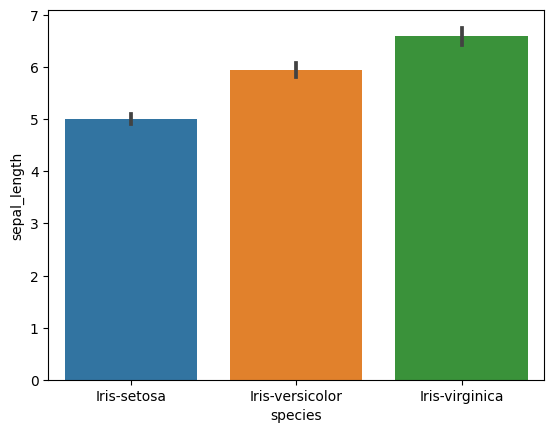

In [12]:
sns.barplot(x = df['species'], y = df['sepal_length'])

<Axes: xlabel='species', ylabel='sepal_width'>

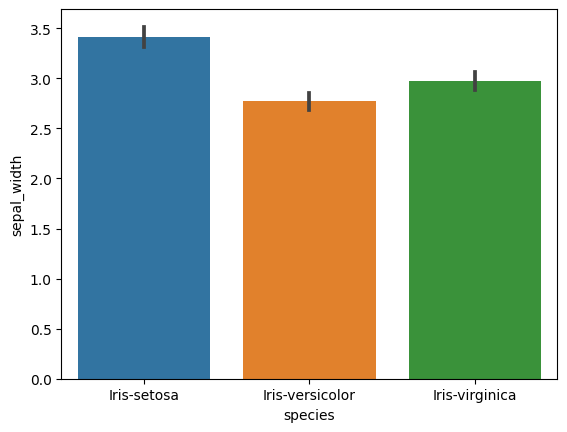

In [13]:
sns.barplot(x = df['species'], y = df['sepal_width'])

<Axes: xlabel='species', ylabel='petal_length'>

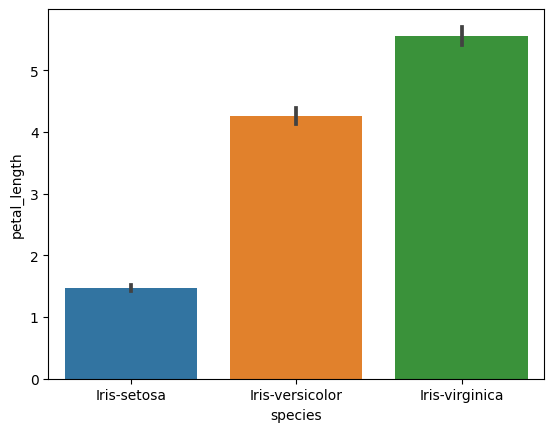

In [14]:
sns.barplot(x = df['species'], y = df['petal_length'])

<Axes: xlabel='species', ylabel='petal_width'>

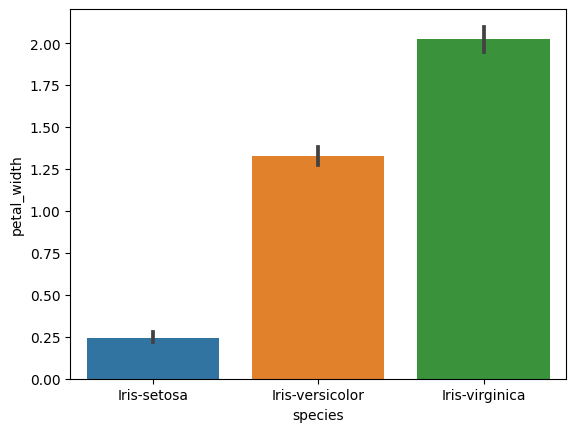

In [15]:
sns.barplot(x = df['species'], y = df['petal_width'])

Box Plot

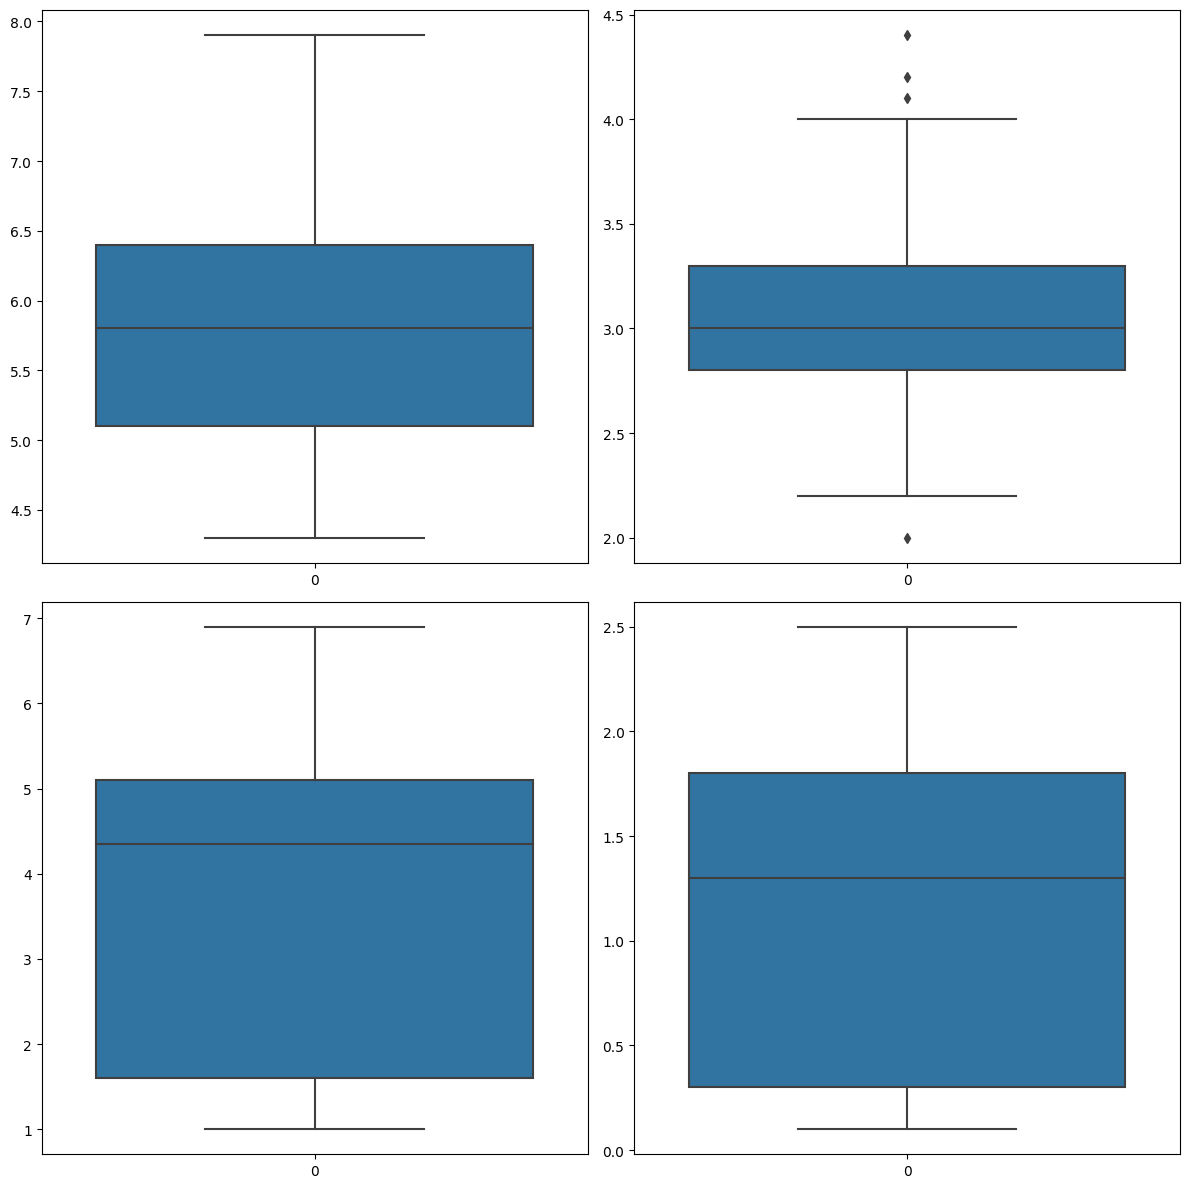

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plt1 = sns.boxplot(df['sepal_length'], ax=axes[0,0])
plt2 = sns.boxplot(df['sepal_width'], ax=axes[0,1])
plt1 = sns.boxplot(df['petal_length'], ax=axes[1,0])
plt2 = sns.boxplot(df['petal_width'], ax=axes[1,1])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x1aef70a0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aef70ac350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aef706e150>],
 'medians': [<matplotlib.lines.Line2D at 0x1aef70ad310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aef7078590>],
 'means': []}

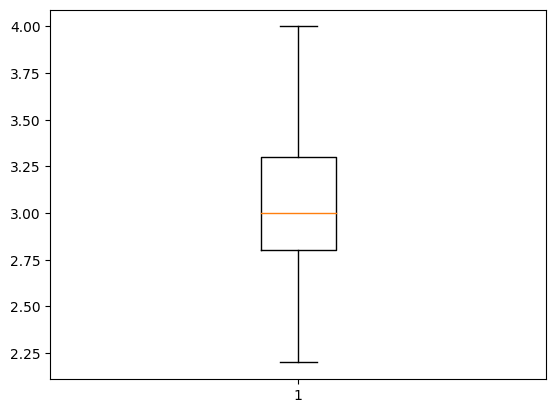

In [17]:
# Deal with outliers

Q1 = df.sepal_width.quantile(0.25)
Q3 = df.sepal_width.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.sepal_width >= Q1 - 1.5*IQR) & (df.sepal_width <= Q3 + 1.5*IQR)]

plt.boxplot(df.sepal_width)

<Axes: xlabel='species', ylabel='sepal_length'>

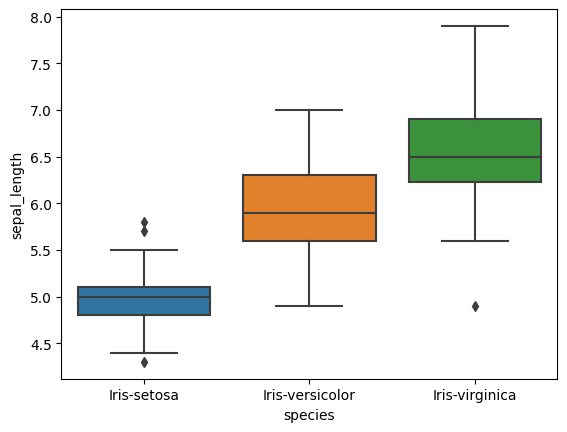

In [18]:
sns.boxplot(x = 'species', y = 'sepal_length', data = df)

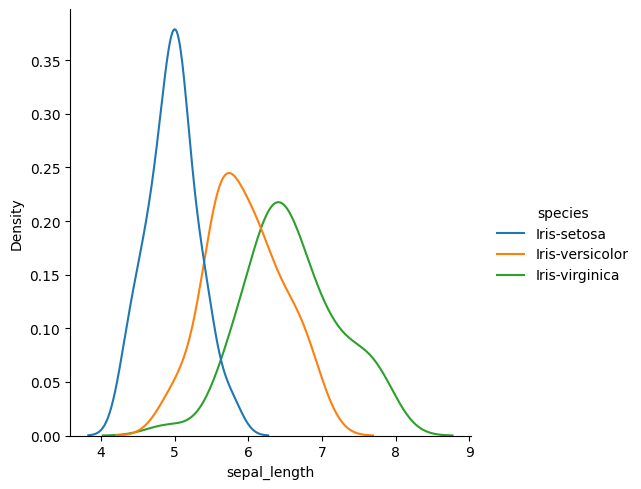

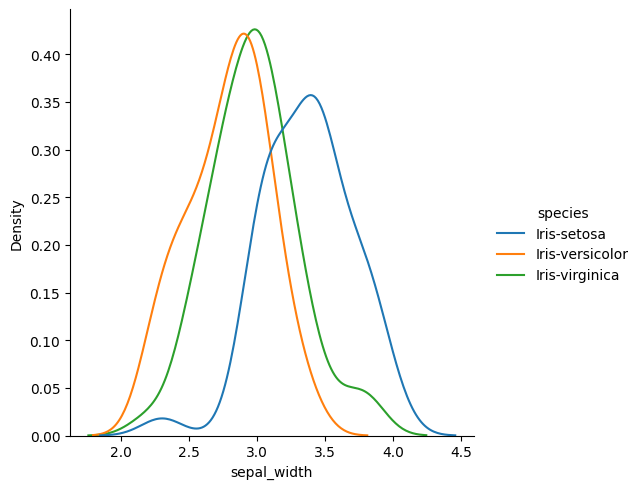

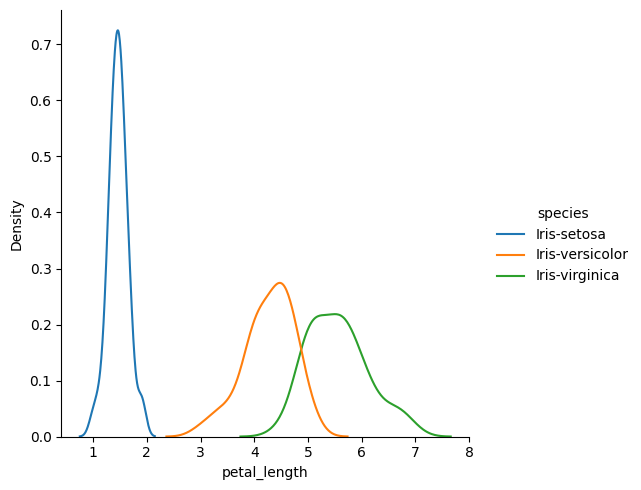

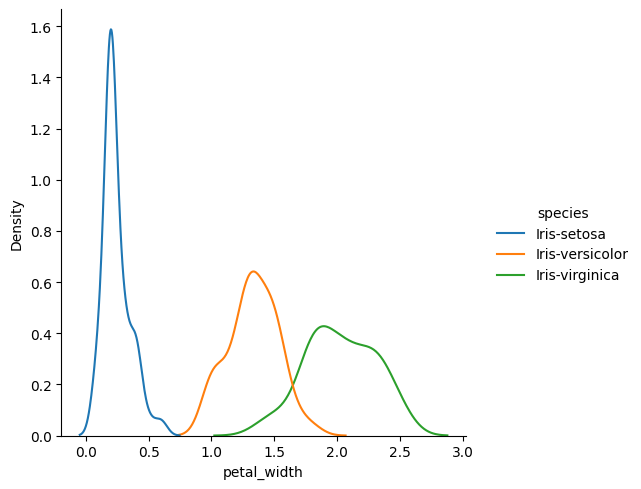

In [19]:
sns.displot(data=df, x="sepal_length", hue="species", kind="kde")
sns.displot(data=df, x="sepal_width", hue="species", kind="kde")
sns.displot(data=df, x="petal_length", hue="species", kind="kde")
sns.displot(data=df, x="petal_width", hue="species", kind="kde")

<Axes: >

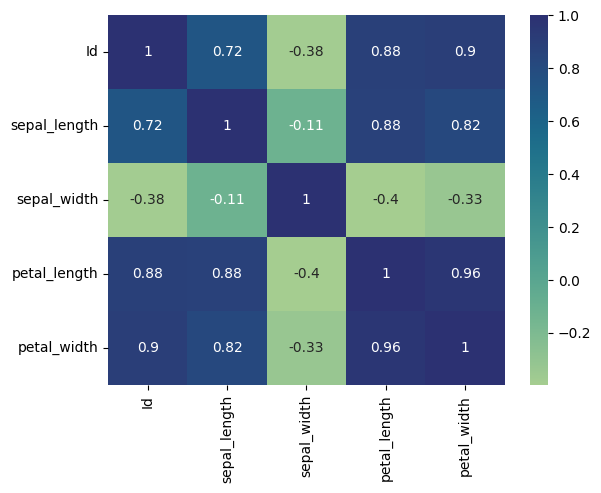

In [20]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True)

Scatter Plot

<Axes: xlabel='petal_length', ylabel='sepal_length'>

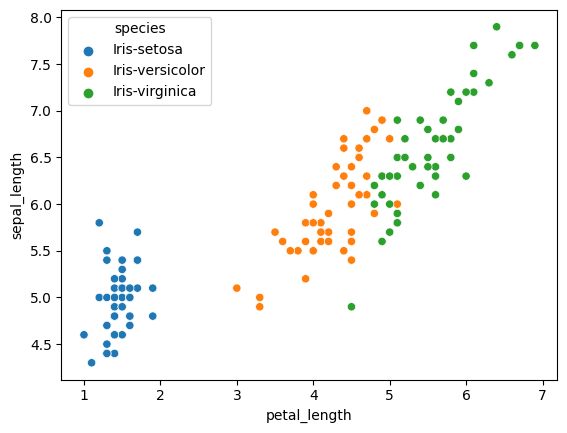

In [21]:
sns.scatterplot(y = df['sepal_length'], x = df['petal_length'], hue = df['species'])

<Axes: xlabel='petal_width', ylabel='sepal_width'>

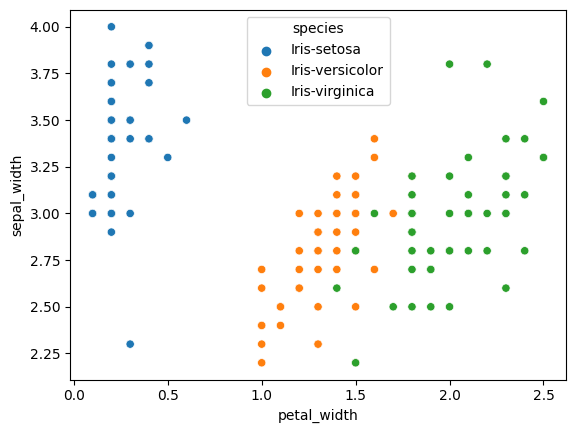

In [22]:
sns.scatterplot(y = df['sepal_width'], x = df['petal_width'], hue = df['species'])

Pair Plot

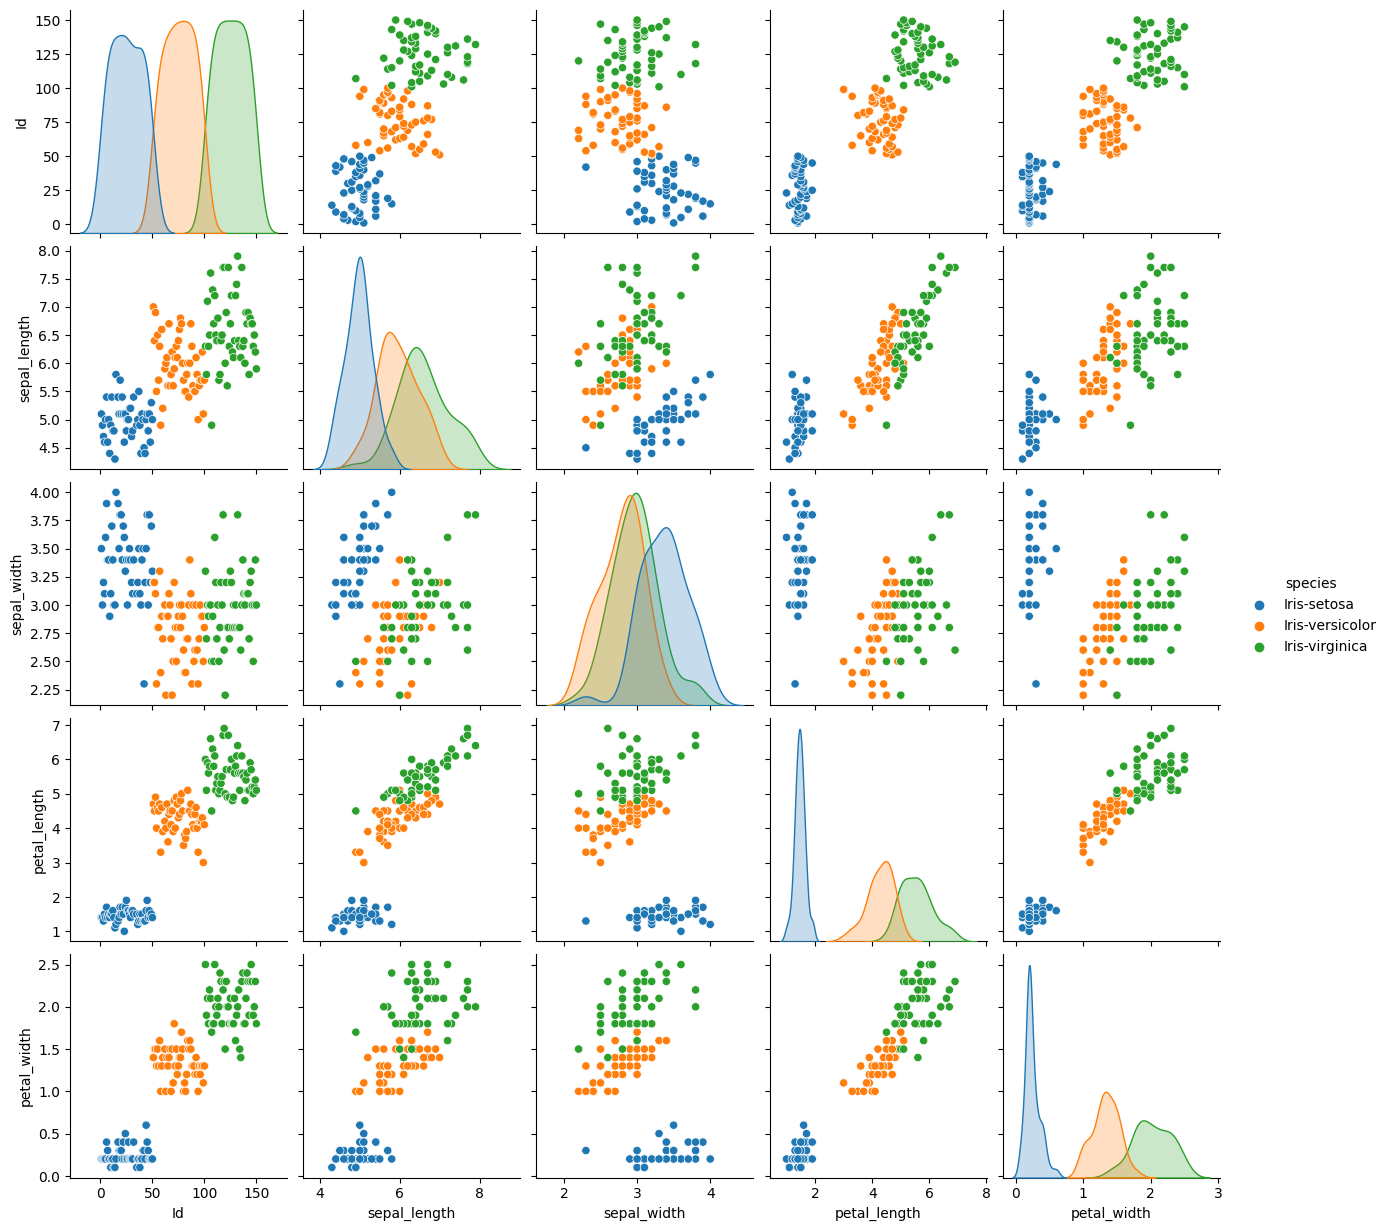

In [23]:
sns.pairplot(df, hue = 'species')

## Correlations


In [24]:
iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [25]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

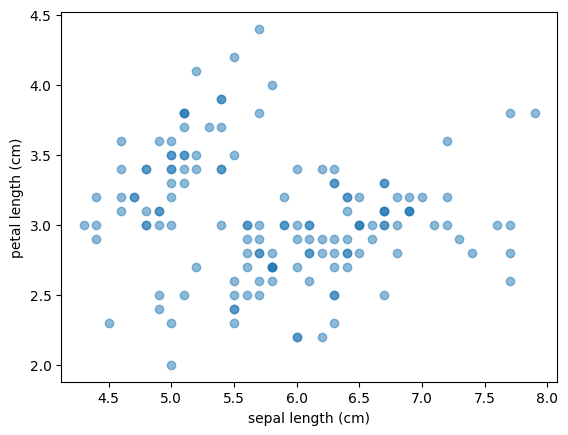

In [27]:
samples = iris.data

x = samples[:,0]
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

plt.show()

## Clustering using k-means

In [28]:
k = 3
model = KMeans(n_clusters=k)

In [29]:
model.fit(samples)

KMeans(n_clusters=3)

In [30]:
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## Train Test Splits

In [31]:
data = df.copy()
data.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
target = 'species'

X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(116, 4)
(30, 4)


## Logistic Regression

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)*100,'%')

Test Accuracy for Scikit-Learn model: 93.33333333333333 %


## Evaluation Metrics

In [34]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

